In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 101)
pd.set_option('display.max_colwidth', 100)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
cd /content/drive/MyDrive/Kaggle/Binary_Prediction_with_a_Rainfall/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Kaggle/Binary_Prediction_with_a_Rainfall/'
/content


In [ ]:
# The information dataset for the training set is already loaded below
data = pd.read_csv('train.csv')
Xe=data.drop(columns=['id','rainfall'])
print(len(data))
data.head()

2190


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


**EXPLORATION**

**RAPIDS SVC w/ Forward Feature Selection**

In [ ]:


from sklearn.model_selection import KFold, GroupKFold
from sklearn.metrics import roc_auc_score
#from sklearn.svm import SVC, LinearSVC
from cuml.svm import SVC, LinearSVC


train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


INTERACT = []
for i,c1 in enumerate(FEATURES):
    for j,c2 in enumerate(FEATURES[i+1:]):
        n = f"{c1}_{c2}"
        train[n] = train[c1] * train[c2]
        test[n] = test[c1] * test[c2]
        INTERACT.append(n)
print(f"There are {len(INTERACT)} interaction features:")
print( INTERACT )

In [ ]:
# prompt: code pour vérifier le nombre de NaN par colonne dans une dataframe
print(data.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [ ]:
data['expected_day'] = (data['id']) % 365 + 1
data['day_mislabelled'] = data['day'] != data['expected_day']
data[data.day_mislabelled==True][['day','id','expected_day','day_mislabelled']]

,day,id,expected_day,day_mislabelled
1037,3,1037,308,True
1132,265,1132,38,True
1210,80,1210,116,True
1251,236,1251,157,True
1284,4,1284,190,True
1290,16,1290,196,True
1312,5,1312,218,True
1318,6,1318,224,True
1346,151,1346,252,True
1352,81,1352,258,True


In [ ]:
data2['expected_day'] = (data2['id']) % 365 + 1
data2['day_mislabelled'] = data2['day'] != data2['expected_day']
data2[data2.day_mislabelled==True][['day','id','expected_day','day_mislabelled']]

,day,id,expected_day,day_mislabelled
31,1,2221,32,True
32,2,2222,33,True
33,3,2223,34,True
34,4,2224,35,True
35,5,2225,36,True
...,...,...,...,...
361,27,2551,362,True
362,28,2552,363,True
363,29,2553,364,True
364,30,2554,365,True


In [ ]:
from scipy import stats
z_scores=np.abs(stats.zscore(Xe))
print(len(Xe[(z_scores>3).any(axis=1)]))
print(len(Xe))

80
2190


In [ ]:
data2[data2.day==1]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,expected_day,day_mislabelled
0,2190,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1,1,False
31,2221,1,1022.2,15.6,12.4,10.7,11.2,93,96,0.0,20.0,31.9,1,32,True
60,2250,1,1024.7,19.7,16.5,14.6,11.5,73,43,9.9,70.0,34.2,0,61,True
91,2281,1,1014.5,25.3,21.9,19.9,19.5,86,83,3.6,50.0,8.3,0,92,True
121,2311,1,1011.5,23.4,22.2,20.4,20.9,92,90,0.5,50.0,23.7,1,122,True
152,2342,1,1007.8,32.8,30.1,28.6,26.2,80,73,7.2,230.0,31.7,0,153,True
182,2372,1,1008.9,33.0,30.1,27.7,26.0,79,78,5.3,190.0,21.9,1,183,True
213,2403,1,1011.2,32.2,28.9,26.9,24.6,78,69,10.7,20.0,11.8,0,214,True
244,2434,1,1007.8,28.9,27.4,25.7,25.4,89,87,0.4,50.0,8.6,1,245,True
274,2464,1,1013.0,31.7,28.8,26.4,25.3,81,84,2.9,30.0,7.9,1,275,True


array([[<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>,
        <Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

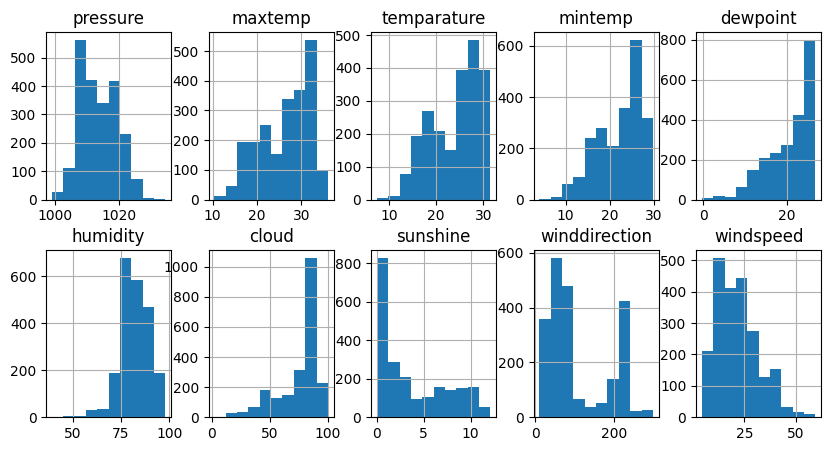

In [ ]:
Xe[['pressure','maxtemp', 	'temparature', 	'mintemp' ,	'dewpoint' ,	'humidity' ,	'cloud' ,	'sunshine' ,	'winddirection' ,	'windspeed']].hist(bins=10,figsize=(10,5), layout=(2,5))

((array([-3.417104  , -3.16774281, -3.02952782, ...,  3.02952782,
          3.16774281,  3.417104  ]),
  array([  2.,   7.,  11., ..., 100., 100., 100.])),
 (16.523741480101574, 75.72191780821917, 0.9155690537835556))

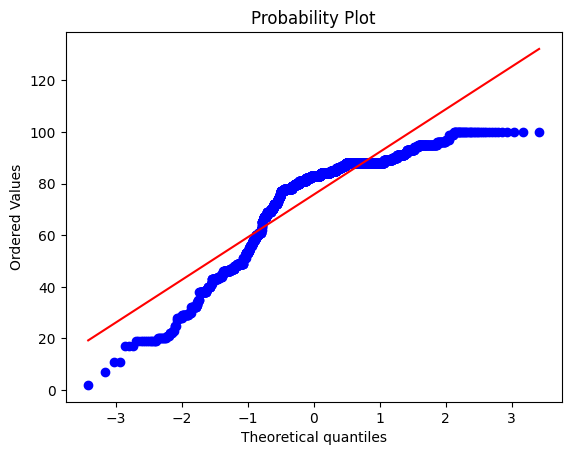

In [ ]:
stats.probplot(Xe['cloud'], dist='norm',plot=plt)


(array([251., 167.,  99., 138., 194., 466., 619., 117.,  89.,  50.]),
 array([-2.01760856, -1.60784387, -1.19807919, -0.7883145 , -0.37854982,
         0.03121487,  0.44097956,  0.85074424,  1.26050893,  1.67027361,
         2.0800383 ]),
 <BarContainer object of 10 artists>)

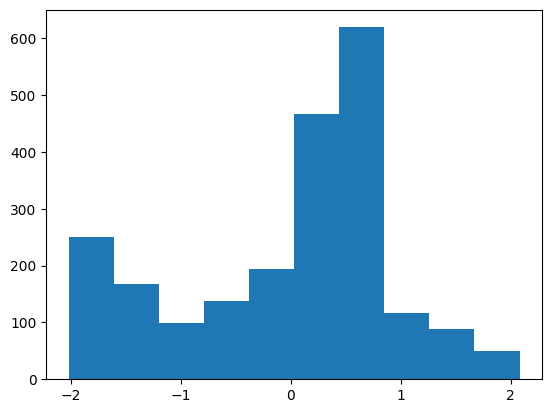

In [ ]:
#plt.hist(Xe['cloud'], bins=10)
plt.hist(X_scaled, bins=10)

In [ ]:
for c in data.columns:
  print("{} skewness : {}".format(c,data[c].skew()))


id skewness : 0.0
day skewness : 1.2643929602947204e-05
pressure skewness : 0.296105343534001
maxtemp skewness : -0.49869077934091444
temparature skewness : -0.572836902619834
mintemp skewness : -0.6656190469352171
dewpoint skewness : -0.39430634258691993
humidity skewness : -0.7461126961803846
cloud skewness : -0.48225944794596737
sunshine skewness : 0.5996343914227636
winddirection skewness : 0.721490116016345
windspeed skewness : 0.7699422755201935
rainfall skewness : -1.1125804202603702


In [ ]:
#check for best period of lag
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['rainfall'], lags=5)  # Change 30 to test different lag ranges
plt.show()

**UNUSED TESTS**

In [ ]:
#RANDOM TEST SPLIT DOESNT WORK WITH TIME SERIES DATA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=data.drop(columns=['id','rainfall'])
#X.fillna(X.mean(),inplace=True)
#X['cloud']=X_scaled
y=data['rainfall']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
#RANDOM CV DOESNT WORK WITH TIME SERIES DATA
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42) # Example: 5-fold cross-validation
#model = XGBClassifier() # Replace with your chosen model
model=RandomForestClassifier()
# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc') # Example scoring metric

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

**INCORPORATE ORIGINAL DATASET**

In [ ]:
# The information dataset for the training set is already loaded below
# The information dataset for the training set is already loaded below
data = pd.read_csv('train.csv')
Xe=data.drop(columns=['id','rainfall'])
print(len(data))
data.head()
data2 = pd.read_csv('/content/drive/MyDrive/Kaggle/Original Dataset Rainfall Prediction/Rainfall.csv')
data2['id']=[i for i in range(len(data),len(data)+len(data2))]
data2['rainfall'] = data2['rainfall'].replace({'yes': 1, 'no': 0})
data2['humidity']=data2['humidity ']
data2['cloud']=data2['cloud ']
data2['pressure']=data2['pressure ']
data2['winddirection']=data2['         winddirection']
data2=data2.drop(columns=['         winddirection','humidity ','cloud ','pressure '])
data2 = data2[data.columns.to_list()]
print(data2.head())
data = pd.concat([data, data2],ignore_index=True)
print(len(data))
data.tail()

2190
     id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1025.9     19.9         18.3     16.8      13.1        72   
1  2191    2    1022.0     21.7         18.9     17.2      15.6        81   
2  2192    3    1019.7     20.3         19.3     18.0      18.4        95   
3  2193    4    1018.9     22.3         20.6     19.1      18.8        90   
4  2194    5    1015.9     21.3         20.7     20.2      19.9        95   

   cloud  sunshine  winddirection  windspeed  rainfall  
0     49       9.3           80.0       26.3         1  
1     83       0.6           50.0       15.3         1  
2     91       0.0           40.0       14.2         1  
3     88       1.0           50.0       16.9         1  
4     81       0.0           40.0       13.7         1  
2556


<ipython-input-94-033c9d6c2d5e>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['rainfall'] = data2['rainfall'].replace({'yes': 1, 'no': 0})


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2551,2551,27,1022.7,18.8,17.7,16.9,15.0,84.0,90.0,0.0,30.0,18.4,1
2552,2552,28,1026.6,18.6,17.3,16.3,12.8,75.0,85.0,1.0,20.0,25.9,1
2553,2553,29,1025.9,18.9,17.7,16.4,13.3,75.0,78.0,4.6,70.0,33.4,1
2554,2554,30,1025.3,19.2,17.3,15.2,13.3,78.0,86.0,1.2,20.0,20.9,1
2555,2555,31,1026.4,20.5,17.8,15.5,13.0,74.0,66.0,5.7,20.0,23.3,0


**PREPROCESSING**

In [ ]:
#adding lag
for c in ['temparature','cloud','humidity','sunshine']:
  data[c+'_lag1'] = data[c].shift(1)
  data[c+'_lag5'] = data[c].shift(5)
  data[c+'_lag7'] = data[c].shift(7)
  data[c+'_rolling5'] = data[c].rolling(window=5).mean()
  data[c+'_ema5'] = data[c].ewm(span=5, adjust=False).mean()
  data[c+'_rolling_max5'] = data[c].rolling(window=5).max()
  data[c+'_rolling_std5'] = data[c].rolling(window=5).std()
data.fillna(data.mean(),inplace=True)

In [ ]:
lagged_features=[f for f in data.columns.tolist() if '_' in f]

In [ ]:
import pandas as pd

# Calculate correlation of lag features with rainfall
correlations = data[lagged_features + ['rainfall']].corr()

# Print correlation of lags with rainfall
#print(correlations['rainfall'].sort_values(ascending=False))

useless_lags = [col for col in lagged_features if abs(correlations.loc[col, 'rainfall']) < 0.1]
data = data.drop(columns=useless_lags)  # Keep only relevant features


In [ ]:
useless_lags

['temparature_lag1',
 'temparature_lag5',
 'temparature_lag7',
 'temparature_rolling5',
 'temparature_ema5',
 'temparature_rolling_max5',
 'temparature_rolling_std5',
 'cloud_lag5',
 'cloud_lag7',
 'humidity_lag5',
 'humidity_lag7',
 'humidity_rolling_std5',
 'sunshine_lag5',
 'sunshine_lag7']

In [ ]:
data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,cloud_lag1,cloud_rolling7,cloud_ema7,cloud_rolling_max7,cloud_rolling_std7,humidity_lag1,humidity_rolling7,humidity_ema7,humidity_rolling_max7,sunshine_lag1,sunshine_rolling7,sunshine_ema7,sunshine_rolling_max7,sunshine_rolling_std7
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,75.06771,75.056639,88.000000,89.393333,14.259881,81.773386,81.774174,87.00000,90.172941,3.840352,3.844,1.100000,8.116275,2.873442
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,88.00000,75.056639,88.750000,89.393333,14.259881,87.000000,81.774174,89.00000,90.172941,1.100000,3.844,0.825000,8.116275,2.873442
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,91.00000,75.056639,78.312500,89.393333,14.259881,95.000000,81.774174,85.50000,90.172941,0.000000,3.844,2.693750,8.116275,2.873442
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,47.00000,75.056639,82.484375,89.393333,14.259881,75.000000,81.774174,87.87500,90.172941,8.300000,3.844,2.020313,8.116275,2.873442
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,95.00000,75.056639,73.113281,89.393333,14.259881,95.000000,81.774174,78.90625,90.172941,0.000000,3.844,2.415234,8.116275,2.873442


In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
data['day'] = (data['id']) % 365 + 1
#data.sort_values(by='day', inplace=True, ignore_index=True)


In [ ]:
data['day_of_year_sin'] = np.sin(2 * np.pi * data['day'] / 365)
data['day_of_year_cos'] = np.cos(2 * np.pi * data['day'] / 365)
data['year_group'] = data['id']//365

In [ ]:
X_transformed, lambda_ = boxcox(data['cloud'] + 1)
X_scaled = scaler.fit_transform(X_transformed.reshape(-1, 1)).flatten()
data['cloud']=X_scaled

In [ ]:
X_transformed, lambda_ = boxcox(data['dewpoint'] + 1)
X_scaled = scaler.fit_transform(X_transformed.reshape(-1, 1)).flatten()
data['dewpoint']=X_scaled


In [ ]:
from scipy.stats import skew
print(skew(data.cloud))

-0.48197638568947193


In [ ]:
df_preprocessed = data.copy()

In [ ]:
data[(2556-366):2555]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2190,2190,1,1025.9,19.9,18.3,16.8,-1.404876,72.0,-1.511970,9.3,80.0,26.3,1
2191,2191,2,1022.0,21.7,18.9,17.2,-1.062951,81.0,0.323523,0.6,50.0,15.3,1
2192,2192,3,1019.7,20.3,19.3,18.0,-0.588218,95.0,1.042059,0.0,40.0,14.2,1
2193,2193,4,1018.9,22.3,20.6,19.1,-0.512177,90.0,0.757749,1.0,50.0,16.9,1
2194,2194,5,1015.9,21.3,20.7,20.2,-0.292185,95.0,0.163211,0.0,40.0,13.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2550,361,1020.6,19.7,17.9,16.9,-1.380263,74.0,0.666998,0.6,30.0,21.6,0
2551,2551,362,1022.7,18.8,17.7,16.9,-1.151894,84.0,0.945259,0.0,30.0,18.4,1
2552,2552,363,1026.6,18.6,17.3,16.3,-1.440921,75.0,0.491396,1.0,20.0,25.9,1
2553,2553,364,1025.9,18.9,17.7,16.4,-1.380263,75.0,-0.063451,4.6,70.0,33.4,1


In [ ]:
#USING ORIGINAL DATASET AS TEST DATASET
X=data.drop(columns=['id','rainfall'])
y=data['rainfall']
#2190 pour 1 an en test
X_train, X_test = X[:1825], X[1825:2556]
y_train, y_test = y[:1825], y[1825:2556]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, roc_auc_score

tscv = TimeSeriesSplit(n_splits=5)

# Example of how to use TimeSeriesSplit
#for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
#    print(f"\nFold {fold+1}:")
#    print(f"  Train indices: {train_idx[:5]} ... {train_idx[-5:]}")
#    print(f"  Validation indices: {val_idx[:5]} ... {val_idx[-5:]}")


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model choice
#model = XGBClassifier() # Replace with your chosen model
model=RandomForestClassifier()

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='roc_auc') # Example scoring metric

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.86241913 0.88175676 0.91338959 0.87694687 0.8718748 ]
Mean cross-validation score: 0.8812774308803462


In [ ]:
data2.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
361,2551,27,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4,1
362,2552,28,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9,1
363,2553,29,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4,1
364,2554,30,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9,1
365,2555,31,1026.4,20.5,17.8,15.5,13.0,74,66,5.7,20.0,23.3,0


**AUTO ML**

***RF WITH CV : ROC 0.86***

In [ ]:
!pip install XGBoost

In [ ]:
model.fit(X_train,y_train)
y_proba = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, y_proba)
print("Test ROC AUC:", test_auc)


Test ROC AUC: 0.8593474933027172


**ANALYSIS OF RESULT AFTER TESTING MODEL**

In [ ]:
errors = np.abs(y_proba - y_test)
original_dataset = data[2190:].copy()
original_dataset['error']=errors

In [ ]:
len(original_dataset[(original_dataset.error>=0.5) & (original_dataset.rainfall==0) ])

40

array([[<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>,
        <Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

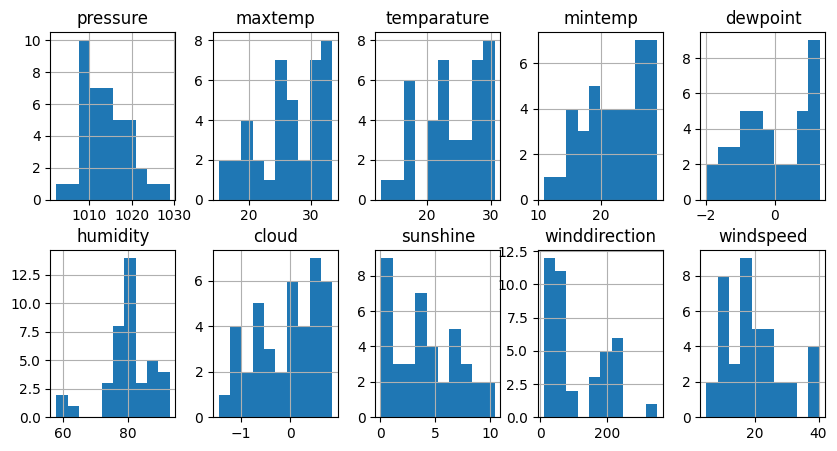

In [ ]:
original_dataset[(original_dataset.error>=0.5) & (original_dataset.rainfall==0) ][['pressure','maxtemp', 	'temparature', 	'mintemp' ,	'dewpoint' ,	'humidity' ,	'cloud' ,	'sunshine' ,	'winddirection' ,	'windspeed']].hist(bins=10,figsize=(10,5), layout=(2,5))

array([[<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>,
        <Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

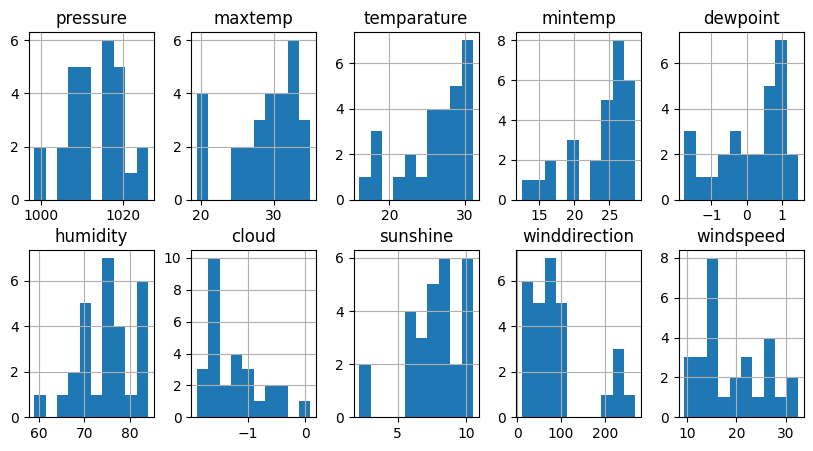

In [ ]:
original_dataset[(original_dataset.error>=0.5) & (original_dataset.rainfall==1) ][['pressure','maxtemp', 	'temparature', 	'mintemp' ,	'dewpoint' ,	'humidity' ,	'cloud' ,	'sunshine' ,	'winddirection' ,	'windspeed']].hist(bins=10,figsize=(10,5), layout=(2,5))

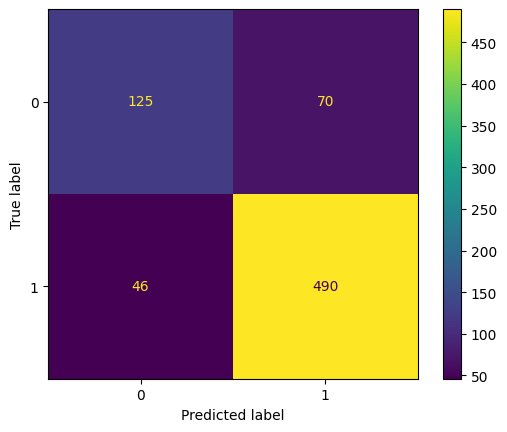

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert probabilities to class labels (threshold = 0.5)
y_pred_labels = (y_proba >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
y_proba

array([0.57, 0.92, 1.  , 0.99, 0.92, 0.38, 0.34, 0.18, 0.53, 0.98, 0.96,
       0.96, 0.02, 0.78, 1.  , 1.  , 0.83, 0.2 , 0.87, 1.  , 1.  , 0.99,
       0.76, 0.71, 0.02, 0.9 , 0.91, 1.  , 0.97, 0.86, 0.97, 0.97, 0.91,
       0.95, 0.11, 0.01, 0.07, 0.04, 0.05, 0.01, 0.6 , 0.9 , 1.  , 0.69,
       0.78, 0.84, 0.96, 0.93, 0.96, 0.98, 0.08, 0.82, 0.97, 0.95, 0.84,
       0.77, 0.74, 0.5 , 0.17, 0.03, 0.23, 0.02, 0.07, 0.36, 0.89, 0.39,
       0.86, 0.98, 0.98, 0.97, 1.  , 0.91, 0.98, 0.92, 0.88, 0.98, 1.  ,
       0.95, 0.86, 1.  , 0.99, 1.  , 0.99, 0.96, 0.94, 0.13, 0.05, 0.05,
       0.32, 0.95, 0.73, 0.75, 0.92, 0.89, 0.93, 0.93, 0.9 , 0.89, 0.93,
       0.99, 0.97, 1.  , 1.  , 0.84, 0.82, 1.  , 0.97, 1.  , 0.91, 0.97,
       1.  , 0.88, 0.8 , 0.87, 0.91, 0.98, 1.  , 0.83, 0.96, 0.65, 0.98,
       1.  , 0.92, 0.97, 0.97, 0.99, 0.99, 0.84, 0.89, 0.86, 0.92, 0.51,
       0.87, 0.99, 1.  , 0.8 , 0.66, 0.95, 0.92, 0.99, 0.94, 0.94, 0.59,
       0.89, 0.67, 0.39, 0.99, 1.  , 1.  , 0.97, 0.

In [ ]:
from sklearn.inspection import permutation_importance

# Get feature importance
feature_importances = model.feature_importances_
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Display feature importance
feature_names = X_train.columns.to_list()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Feature Importance': feature_importances,
    'Permu Importance': result.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)

print(importance_df)

                  Feature  Feature Importance  Permu Importance
7                   cloud            0.203869      6.019152e-02
8                sunshine            0.125340      1.723666e-02
6                humidity            0.082117     -1.367989e-03
13             cloud_ema7            0.053688     -1.641587e-03
18          humidity_ema7            0.041175     -9.575923e-04
22          sunshine_ema7            0.037057      2.188782e-03
15     cloud_rolling_std7            0.036919      2.462380e-03
5                dewpoint            0.034204      2.735978e-03
12         cloud_rolling7            0.029530      5.551115e-17
1                pressure            0.028573     -2.325581e-03
2                 maxtemp            0.027089      4.651163e-03
17      humidity_rolling7            0.026903      1.504788e-03
21      sunshine_rolling7            0.026341     -2.735978e-04
24  sunshine_rolling_std7            0.025350      1.367989e-04
10              windspeed            0.0

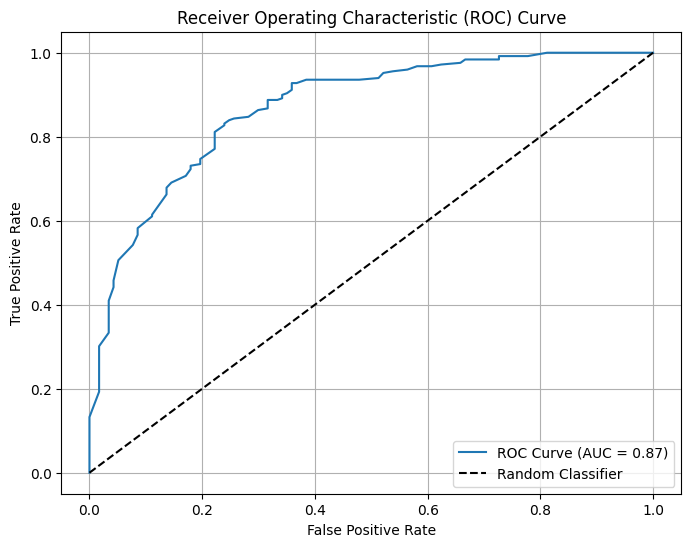

In [ ]:

# prompt: plot roc auc curve measure by sklearn roc_auc_score metric, it was used as a scoring metric for a classifier that predicted probabilities

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming you have y_test and y_proba from the previous code
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
y_proba

array([0.82, 0.93, 0.52, 0.81, 0.88, 1.  , 0.98, 0.83, 0.74, 0.96, 0.99,
       0.72, 0.61, 0.01, 0.38, 0.72, 0.93, 0.69, 0.77, 0.15, 0.22, 0.9 ,
       0.18, 0.9 , 0.38, 0.92, 0.89, 0.68, 0.86, 0.98, 0.98, 0.93, 0.9 ,
       0.25, 0.09, 1.  , 0.96, 0.99, 0.75, 0.31, 0.87, 0.89, 0.95, 0.97,
       0.97, 0.96, 0.65, 0.94, 0.26, 0.89, 0.97, 0.14, 0.98, 0.99, 0.77,
       0.72, 0.96, 1.  , 0.98, 0.78, 0.44, 0.97, 0.8 , 0.92, 0.99, 0.88,
       0.73, 0.93, 0.92, 0.63, 0.78, 0.93, 0.89, 0.99, 0.27, 0.88, 0.54,
       0.87, 0.95, 0.32, 0.66, 0.97, 0.36, 0.97, 0.99, 0.97, 0.83, 0.38,
       0.97, 0.81, 0.92, 0.94, 0.34, 0.06, 0.9 , 0.84, 0.99, 0.9 , 0.12,
       1.  , 0.95, 0.41, 0.57, 0.95, 0.32, 0.79, 0.91, 0.95, 0.94, 1.  ,
       0.07, 0.91, 0.92, 0.55, 0.95, 0.97, 0.6 , 0.93, 0.94, 0.97, 0.9 ,
       0.97, 1.  , 0.59, 0.86, 0.95, 0.44, 0.97, 1.  , 0.93, 0.66, 0.61,
       0.93, 0.94, 1.  , 0.97, 0.97, 0.34, 0.57, 0.91, 0.22, 0.54, 0.98,
       0.81, 0.17, 0.92, 1.  , 0.98, 0.91, 0.95, 0.

**FIRST MODEL : LINEAR REGRESSION , ROC : 0.89 BUT WEIRD CAUSE WE DIDNT PREDICT PROBA**

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)

449966978592378.3


In [ ]:
y_pred

array([ 0.54308284,  0.93756178,  0.24331065,  0.88571012,  0.33253471,
        0.91501925,  0.75455008,  0.89409859,  0.78071795,  0.32567767,
        0.87806337,  0.74243904,  0.59344053,  0.48573757,  1.02743412,
        0.85058575,  0.72102123,  1.03080129,  1.02520401,  0.90770517,
        0.88763996,  0.31521423,  0.36289809,  0.95367192,  0.57363571,
        0.33013839,  0.66822949,  0.9849315 ,  0.82618385,  0.82758318,
        0.71374337,  0.58786616,  0.95212708,  0.93585792,  0.15725949,
        0.30242245,  0.3998668 ,  0.84344792,  0.94778932,  1.08452811,
        0.99161084,  0.86214876,  0.90208703,  0.33720761,  0.88736366,
        1.08615277,  0.91736691,  0.9713266 ,  0.78891618,  1.02841838,
        0.24234393,  0.60293212,  1.07110995,  0.14872018,  0.48962466,
        0.95170259,  0.33103549,  0.69538573,  1.00930231,  1.03647888,
        0.83617214,  0.25355648,  0.93026194,  0.99872636,  0.86619624,
        0.27198182,  1.00262518,  1.01377788,  0.3472575 ,  0.90

In [ ]:
y_pred = np.clip(y_pred, 0, 1)

In [ ]:
# prompt: code to transform all values of an array that are smaller than 0 to 0, and all values higher than 1 to 1

y_pred = np.clip(y_pred, 0, 1)


0.7852671394799056


In [ ]:
def transform_array(arr, threshold=0.5):
  """Transforms an array so that values are 0 or 1 based on proximity to 0 or 1.

  Args:
    arr: The input NumPy array.
    threshold: The threshold value to determine 0 or 1.

  Returns:
    A new NumPy array with values transformed to 0 or 1.
  """
  transformed_arr = np.where(arr < threshold, 0, 1)
  return transformed_arr

0.7680382497826717


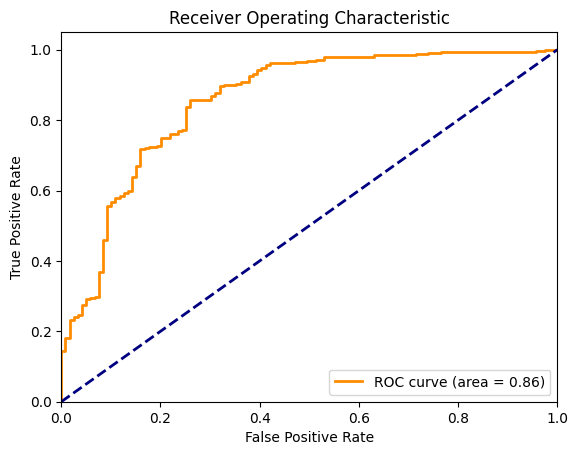

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(roc_auc)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       119
           1       0.86      0.94      0.90       319

    accuracy                           0.84       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.84      0.84       438



array([[<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>,
        <Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

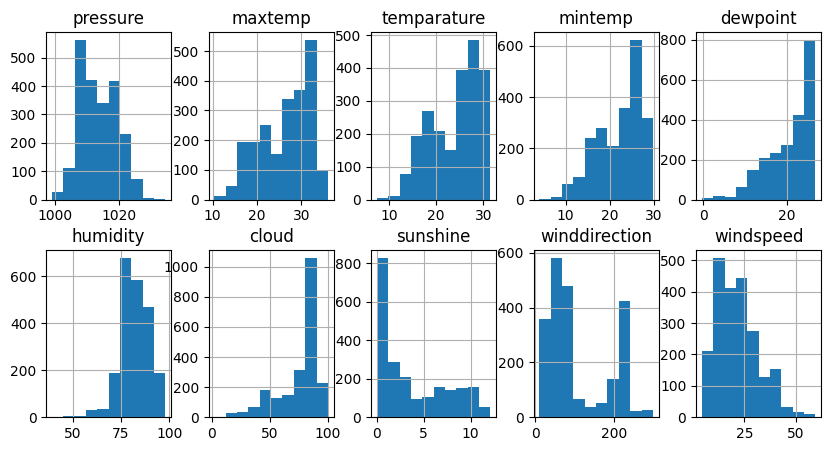

**TEST AND KAGGLE SUBMISSION**

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
#reading test dataset

test['day'] = (test['id']) % 365 + 1
#adding lag
for c in ['temparature','cloud','humidity','sunshine']:
  test[c+'_lag1'] = test[c].shift(1)
  test[c+'_lag5'] = test[c].shift(7)
  test[c+'_lag7'] = test[c].shift(7)
  test[c+'_rolling5'] = test[c].rolling(window=5).mean()
  test[c+'_ema5'] = test[c].ewm(span=5, adjust=False).mean()
  test[c+'_rolling_max5'] = test[c].rolling(window=5).max()
  test[c+'_rolling_std5'] = test[c].rolling(window=5).std()
test=test.drop(columns=useless_lags)
test.fillna(test.mean(),inplace=True)


In [ ]:
X_transformed, lambda_ = boxcox(test['cloud'] + 1)
X_scaled = scaler.fit_transform(X_transformed.reshape(-1, 1)).flatten()
test['cloud']=X_scaled

In [ ]:
X_transformed, lambda_ = boxcox(test['dewpoint'] + 1)
X_scaled = scaler.fit_transform(X_transformed.reshape(-1, 1)).flatten()
test['dewpoint']=X_scaled

In [ ]:
#y_submission
#y_submission=model.predict(test.drop(columns=['id']))
y_submission=model.predict_proba(test.drop(columns=['id']))[:, 1]
#y_submission = np.clip(y_submission, 0, 1)
y_submission
submission_df= pd.DataFrame()
submission_df['id']=test[['id']]
submission_df['rainfall']=y_submission
submission_df

,id,rainfall
0,2190,0.87
1,2191,0.90
2,2192,0.66
3,2193,0.30
4,2194,0.30
...,...,...
725,2915,0.97
726,2916,0.86
727,2917,0.90
728,2918,0.99


In [ ]:
y_submission

array([0.98, 1.  , 0.83, 0.19, 0.15, 0.93, 0.94, 1.  , 0.94, 0.88, 1.  ,
       0.02, 1.  , 0.97, 0.28, 0.09, 0.88, 0.85, 0.02, 0.05, 0.05, 0.18,
       0.62, 1.  , 0.64, 0.48, 0.14, 1.  , 0.93, 0.43, 0.96, 0.98, 0.81,
       0.96, 0.75, 0.99, 0.33, 0.93, 0.93, 0.83, 0.83, 0.75, 0.  , 0.95,
       0.85, 0.09, 0.1 , 1.  , 0.13, 0.8 , 0.86, 1.  , 1.  , 0.91, 0.99,
       0.98, 0.96, 0.85, 0.94, 0.97, 0.83, 0.97, 0.98, 0.98, 0.21, 0.33,
       0.05, 0.77, 0.83, 0.21, 1.  , 0.96, 0.9 , 0.91, 0.99, 0.91, 0.89,
       0.97, 0.44, 1.  , 0.88, 1.  , 0.39, 0.71, 0.94, 0.96, 0.98, 0.83,
       1.  , 0.95, 0.98, 0.85, 0.94, 0.92, 0.95, 0.99, 1.  , 0.9 , 0.86,
       0.8 , 1.  , 0.82, 0.66, 0.97, 0.96, 0.91, 0.95, 1.  , 0.99, 0.87,
       0.94, 0.68, 0.86, 0.99, 0.99, 0.93, 0.94, 0.97, 0.97, 0.97, 0.58,
       0.8 , 0.88, 0.33, 0.94, 0.54, 0.98, 1.  , 0.96, 1.  , 0.99, 0.97,
       0.68, 1.  , 0.94, 0.93, 0.99, 0.95, 0.99, 0.98, 0.98, 0.5 , 0.09,
       0.92, 0.99, 0.91, 0.97, 0.16, 0.96, 0.61, 0.

In [ ]:
#Submission
submission_df.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c playground-series-s5e3 -f submission.csv -m "RF with original dataset as test. ordered CV."

100% 7.07k/7.07k [00:00<00:00, 34.3kB/s]
Successfully submitted to Binary Prediction with a Rainfall Dataset

In [ ]:
!rm /root/.kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
data.describe()
#print(data.isna().sum())
from scipy import stats
z_scores=np.abs(stats.zscore(X))
print(len(X[(z_scores>6).any(axis=1)]))
print(len(X))
stats.probplot(data[data.diffuse_flows>5000]['diffuse_flows'], dist='norm',plot=plt)
plt.hist(data['diffuse_flows'], bins=10)
#plt.hist(X['diffuse_flows'], bins=10)

idées à explorer : réseau de neurones , ajouter le lag pour tous les autres features


UNUSED

